# AI for HumanForYou

Details for our project are below

## Data Preprocessing

Here, I would import, clean, explore and Feature engineering the different datasets provided to extract meaning from them to ensure that a suitable dataframe for training a model can be prepared.

In [140]:
import numpy as np
import pandas as pd

In [141]:
gen_data = pd.read_csv("general_data.csv")
gen_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [142]:
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

The dataset above describes general details about employees in a country based on information from a survy and their columns include the ones as displayed.

In [143]:
emp_data = pd.read_csv("employee_survey_data.csv")
emp_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [144]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


This dataset touches on other details about all the employees and was gathered based on a survey.

In [145]:
in_time_data = pd.read_csv("in_time.csv")
in_time_data.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [146]:
in_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [147]:
out_time_data = pd.read_csv("out_time.csv")
out_time_data.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [148]:
out_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [149]:
manager_data = pd.read_csv("manager_survey_data.csv")
manager_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [150]:
manager_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


Next, for easy analysis of employee related data, I would put each individual dataset into a single dataframe which I would work with and analyse

In [151]:
merged_data = pd.merge(gen_data, manager_data, on='EmployeeID', how='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [152]:
merged_data = pd.merge(merged_data, emp_data, on='EmployeeID', how='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Before going ahead to merge the columns that relate to the arrival and leaving times of employees, we would go ahead a reformat these datasets in order to find the average working hours for each employee throughout the year of 2015 (january to december)

In [153]:
def summarise_working_hours(df_in, df_out):
    df_in.set_index('Unnamed: 0', inplace=True)
    df_out.set_index('Unnamed: 0', inplace=True)

    df_in = df_in.apply(pd.to_datetime, errors='coerce')
    df_out = df_out.apply(pd.to_datetime, errors='coerce')

    df_in = df_in.dropna(axis=1, how='all')
    df_out = df_out.dropna(axis=1, how='all')

    working_hours = (df_out - df_in).apply(lambda x: x.dt.total_seconds() / 3600, axis=0)

    avg_working_hours = np.round(working_hours.mean(axis=1),1)

    # Create a new DataFrame to hold the summary
    summary_df = pd.DataFrame({
        'EmployeeID': df_in.index,
        'AvgWorkingHours': avg_working_hours
    })

    return summary_df


In [154]:
average_time = summarise_working_hours(in_time_data, out_time_data)
average_time

,EmployeeID,AvgWorkingHours
Unnamed: 0,,
1,1,7.4
2,2,7.7
3,3,7.0
4,4,7.2
5,5,8.0
...,...,...
4406,4406,8.5
4407,4407,6.1
4408,4408,7.7


Now that the average working hours of each employee has been calculated, we would now go ahead to combine this with the rest of the merged data in order to form a single wholisitic dataset.

In [155]:
final_merged_data = pd.merge(merged_data, average_time, on='EmployeeID', how='left')
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [156]:
final_merged_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgWorkingHours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,7.4
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,7.7
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,7.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,7.2
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,8.0


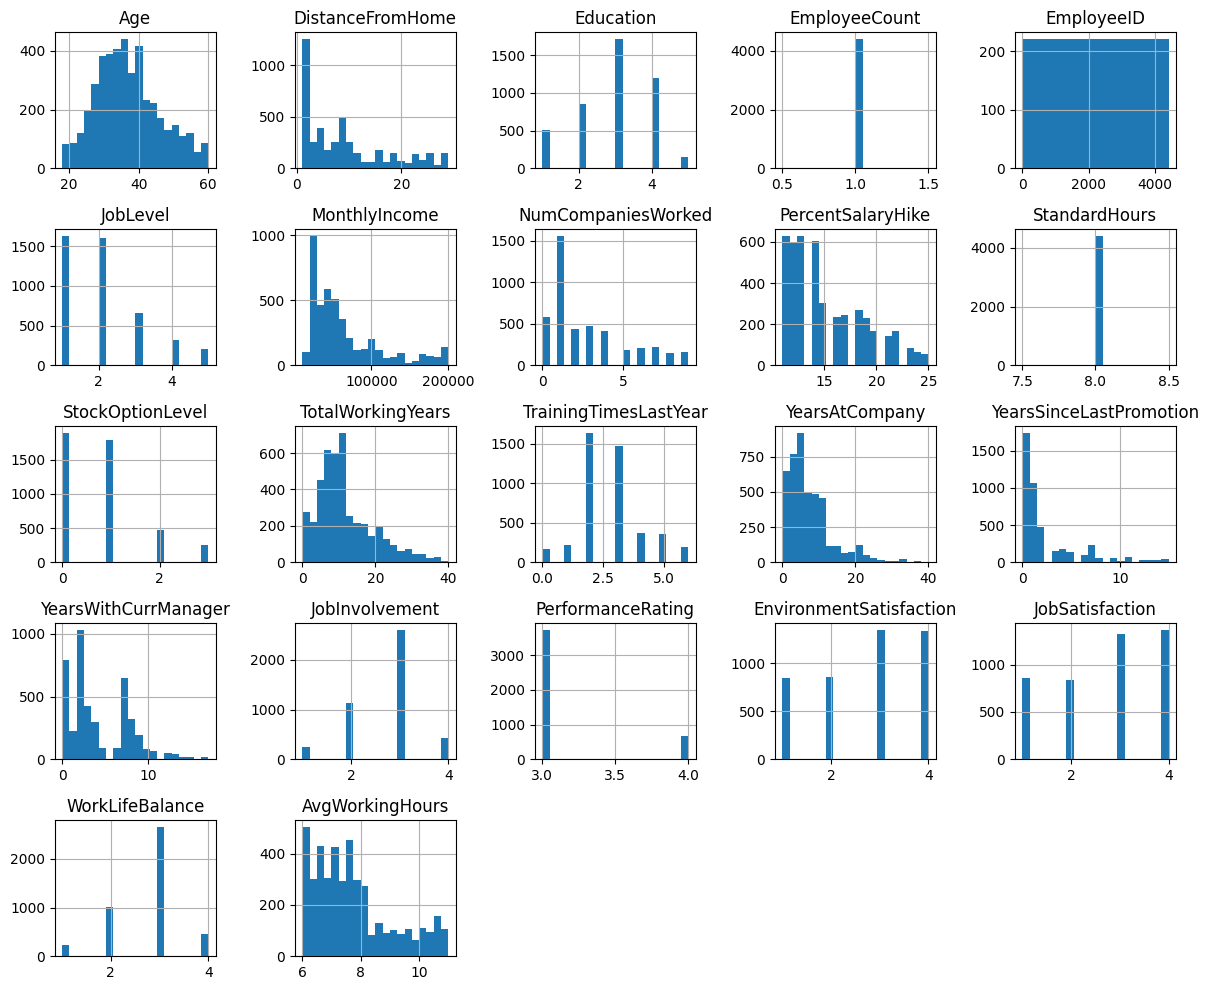

In [157]:
import matplotlib.pyplot as plt

# Plot histograms for every column
final_merged_data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

From observing the structure of the histograms provided per column in the dataset, some of the insights we gathered from this include;

1. Many of the columns, such as DistanceFromHome, TotalWorkingYears, YearsAtCompany, MonthlyIncome, and YearsWithCurrManager, show a skewed distribution, with peaks clustered at specific values or value ranges, majority of which are right-skewed. this observation shows that there are some features in the dataset that are related in some way.

2. The uniform nature structure of the age column shows that majority of employees are around the average age which in this case is about 35 years.

3. The skewed nature of the distanceFromHome column also shows that majority of employees live not too far from home hence do not have to travel far from home.

4. The distribution of MonthlyIncome is heavily right-skewed, meaning most employees earn lower wages, and a smaller number of employees have significantly higher earnings. This correlates with the jobLevel of employees as most employees are lower level employees.

5. Looking at the skew of the averageworking hours column (right skewed) and the standardWorkingHours values (8) it shows that majority of employees work less than the standadrd working hours. This an interesting inference that can be explored.

## Exploratory Data Analysis

Here, I would graphically explore some of the general observations made from the distributions of the dataset above.

**Exploring Age**

Considering the normalised nature of the age column and its small range of ages, we would now explore graphically how age and joblevel and other variables are related.

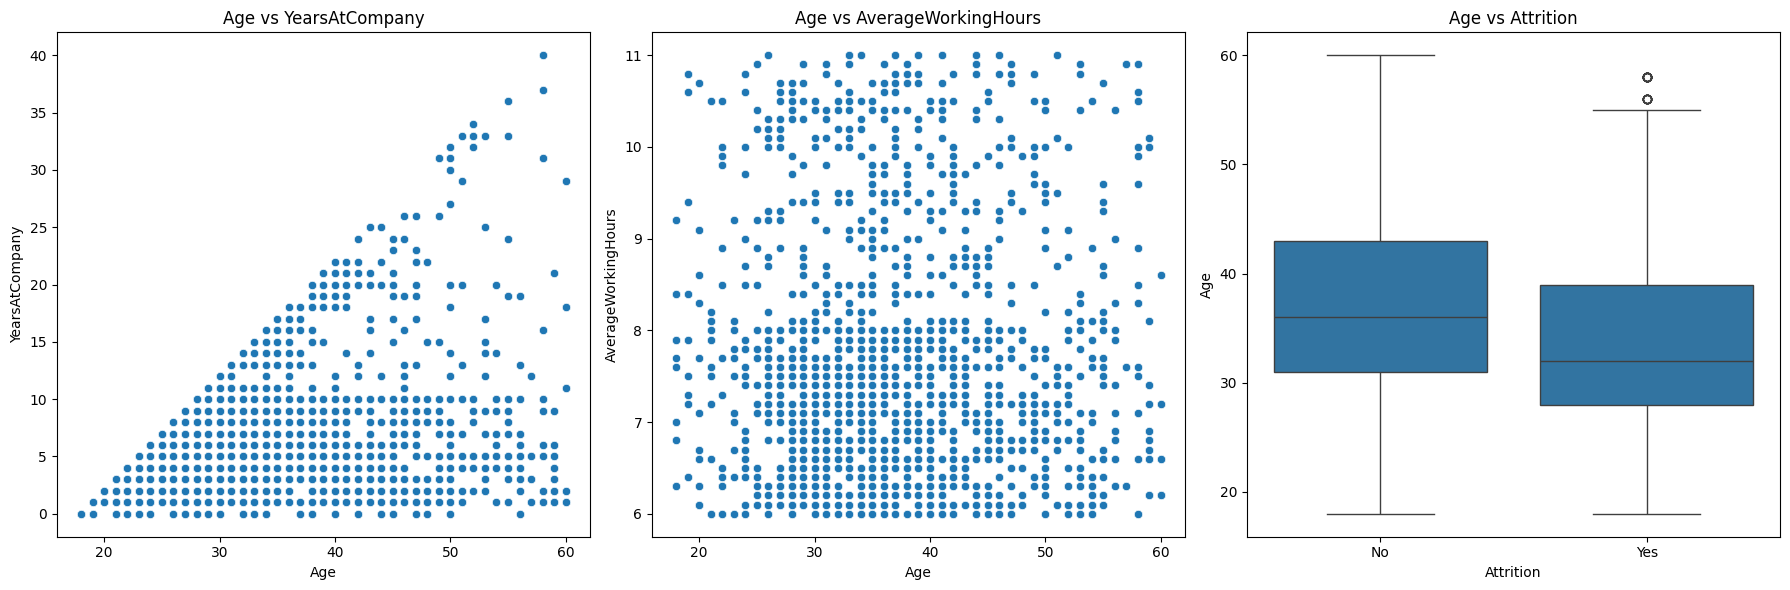

In [158]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x='Age', y='YearsAtCompany', data=final_merged_data, ax=axes[0])
axes[0].set_title('Age vs YearsAtCompany')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('YearsAtCompany')

# Plot Age vs AverageWorkingHours as a scatter plot
sns.scatterplot(x='Age', y='AvgWorkingHours', data=final_merged_data, ax=axes[1])
axes[1].set_title('Age vs AverageWorkingHours')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('AverageWorkingHours')

# Plot Age vs Attrition as a boxplot
sns.boxplot(x='Attrition', y='Age', data=final_merged_data, ax=axes[2])
axes[2].set_title('Age vs Attrition')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Age')

plt.tight_layout()
plt.show()

From observation is seems as though majority of young people in the company left in 2016 and generally seem to be more likely to leave. This is evident from the the boxplot which showed a higher median value for the employees who didn't leave and this is also evident from the positive correlation between YearsAtCompany and Age.

Now we would explore the features that seemed to be skewed to understand if there are any significant outliers that should be viewed or analysed.

In [159]:
final_merged_data.nunique()


Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
JobInvolvement                4
PerformanceRating             2
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
AvgWorkingHours              51
dtype: int64

Now, to explore the columns that might not have been plotted and the rest of the dataset, we would plot the distribution of the categorical variables to understand their general distribution.

In [160]:
categorical_columns = [
    'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 
    'Gender', 'MaritalStatus', 'JobLevel', 'JobRole', 'PerformanceRating', 
    'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Over18', 'JobInvolvement'
]


C:\Users\palal\AppData\Local\Temp\ipykernel_65164\3908050721.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\palal\AppData\Local\Temp\ipykernel_65164\3908050721.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\palal\AppData\Local\Temp\ipykernel_65164\3908050721.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\palal\AppData\Local\Temp\ipykernel_65164\3908050721.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklab

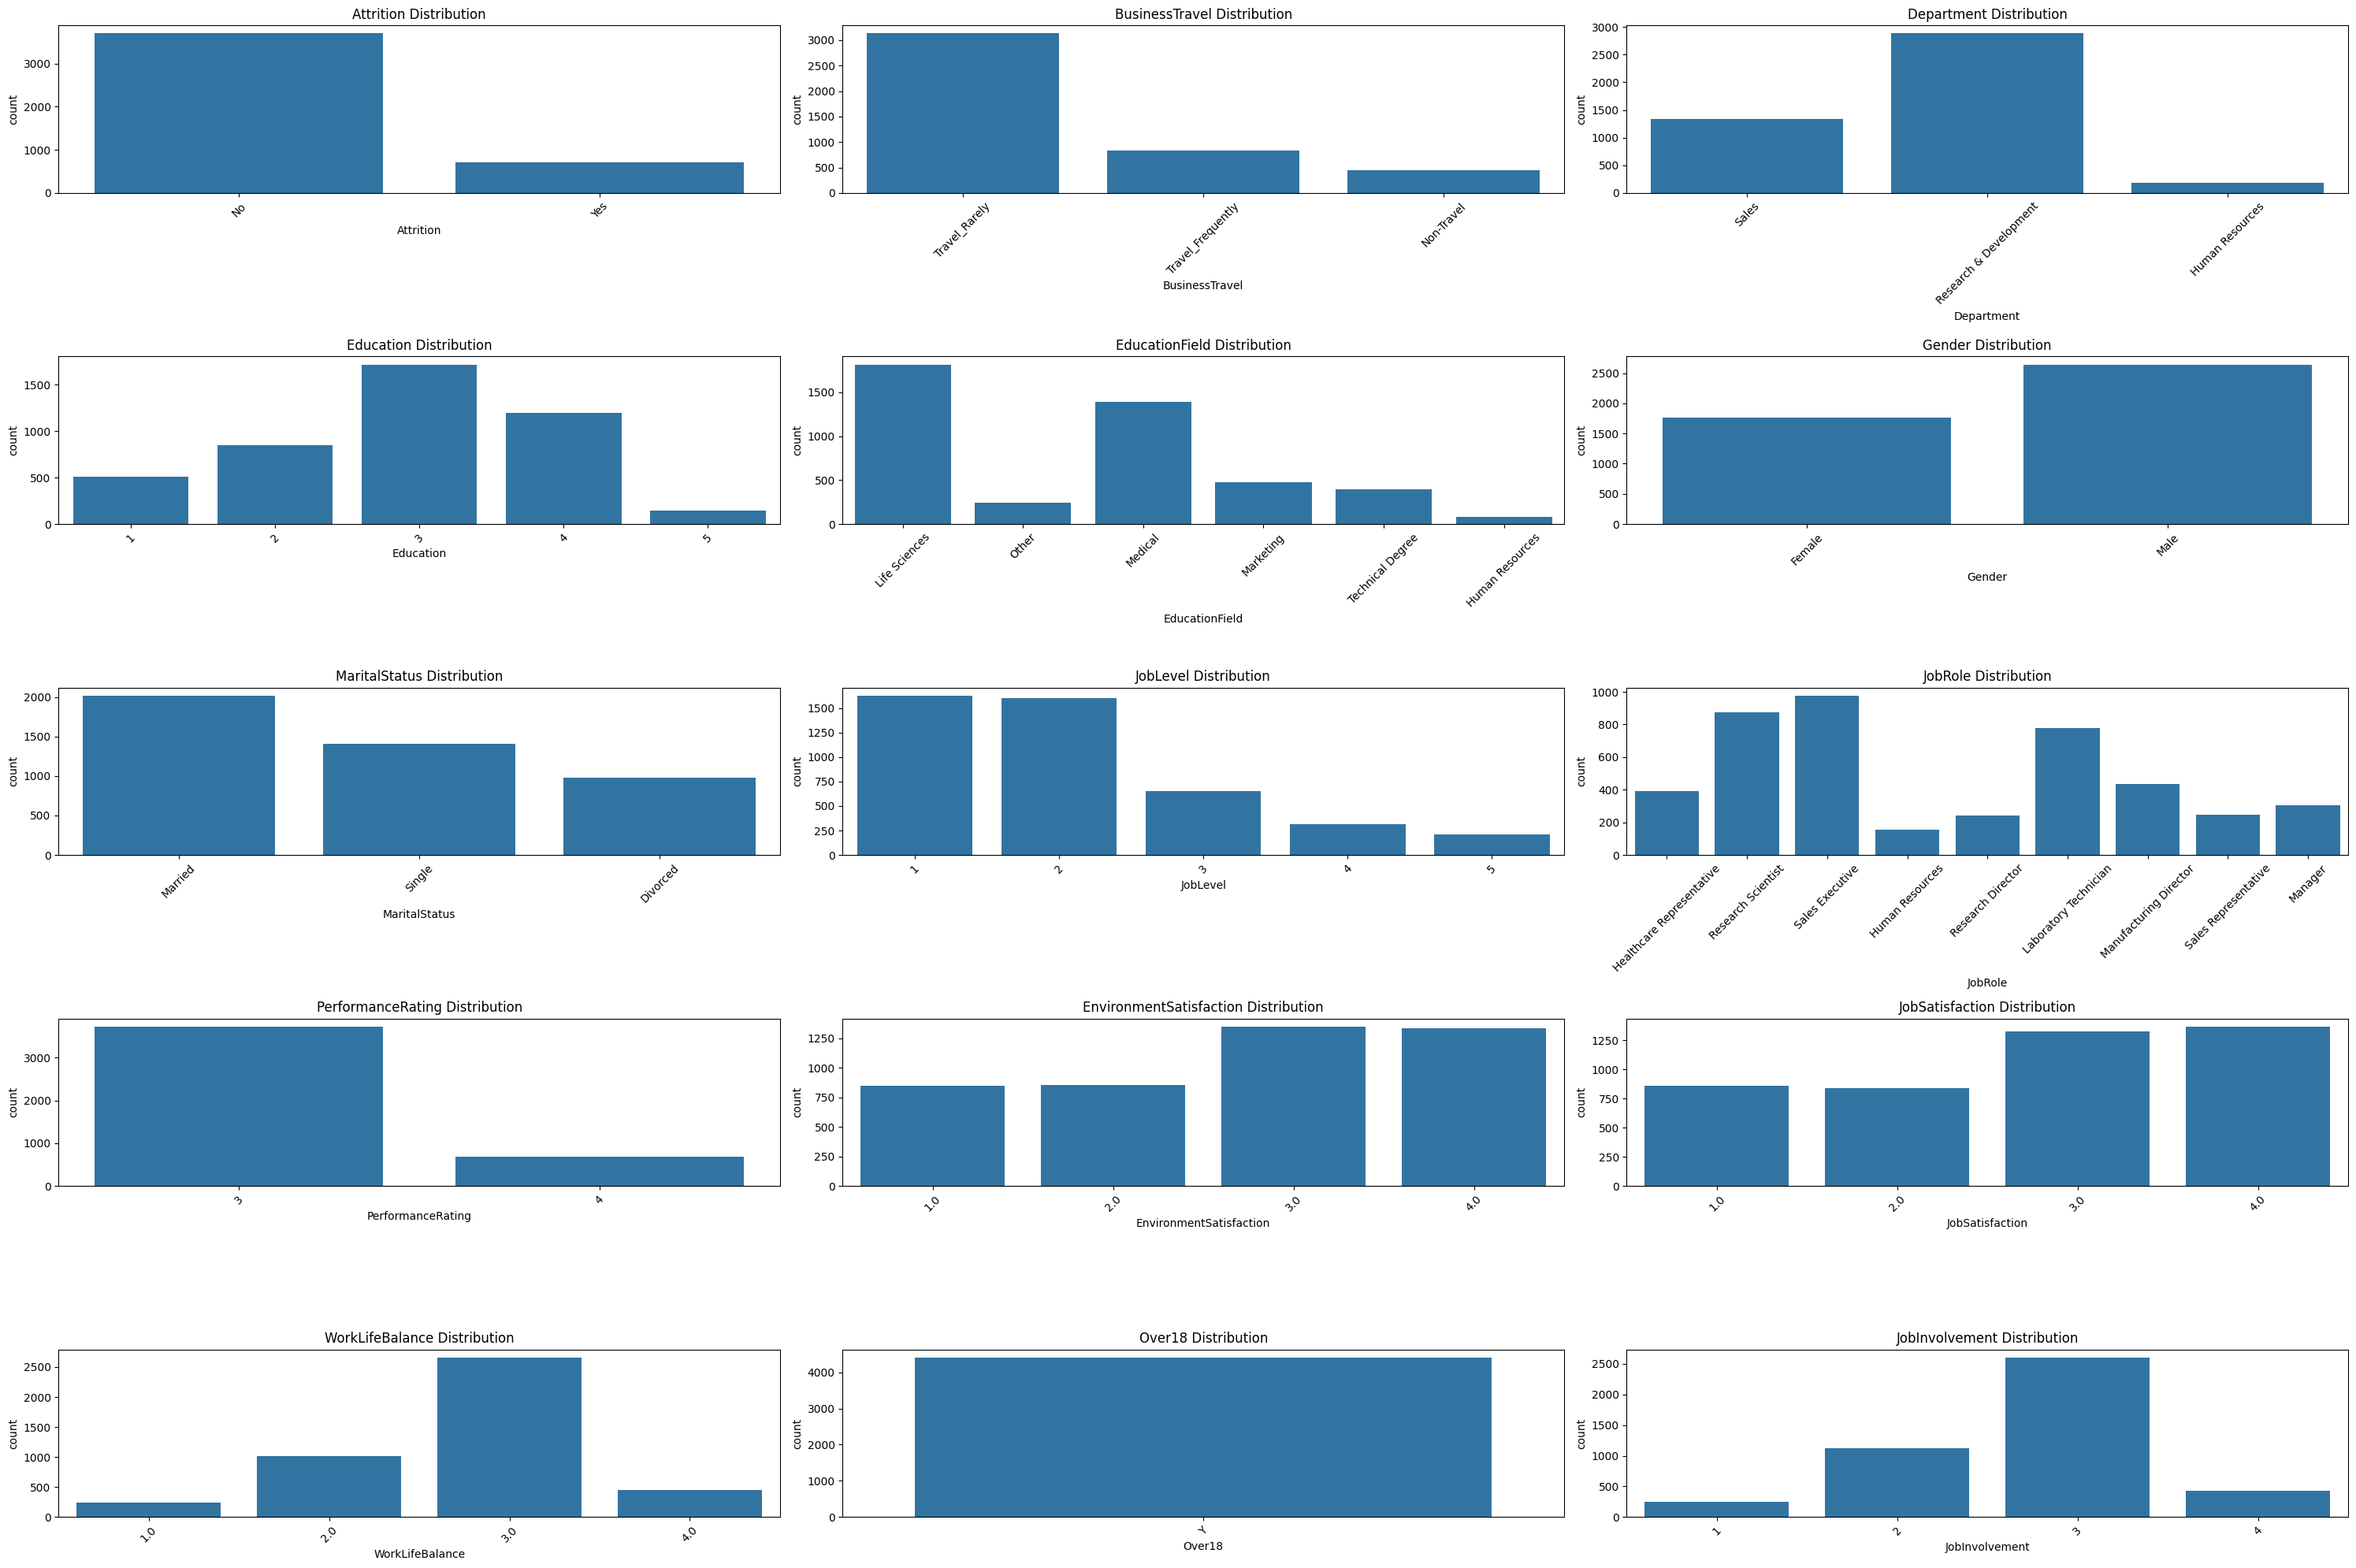

In [161]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 20))
axes = axes.flatten()

# Loop through the categorical columns and plot count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=final_merged_data, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

From observing the distribution of these graphs, these are some of the insights that can be observed;

1. A large number of individuals stayed in the company than those who left. This makes it more interesting to explore how this correlates with the gender, which is another categorical variable.

2. The Over18 column would not be so useful considering that all employees are over18 years old.

3. The employees in the company are mostly males. This makes it interesting to explore how the gender correlates with some of the other categorical variables.

In [162]:
final_merged_data.drop('Over18', axis=1, inplace=True)

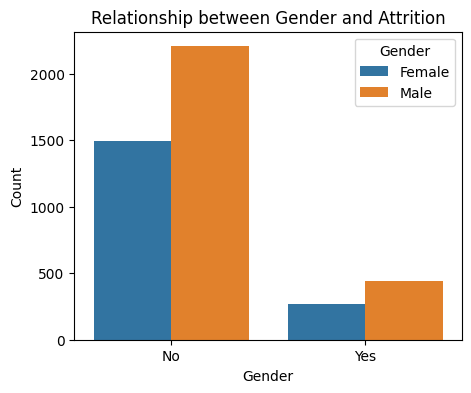

In [168]:
plt.figure(figsize=(5, 4))

sns.countplot(x='Attrition', hue='Gender', data=final_merged_data)

plt.title('Relationship between Gender and Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

From observating the number of male and female employees who left the company in 2016, it is obvious that most individuals who left were men. But the fact that most of the individuals who stayed are also men, this just shows the high count of men who have been involved in the company.

In [195]:
all_columns = final_merged_data.columns

first_9_columns = all_columns[:15]
next_9_columns = all_columns[15:20]
remaining_columns = all_columns[20:]

In [196]:
final_merged_data[first_9_columns].describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000


In [197]:
final_merged_data[next_9_columns].describe()

,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear
count,4410.000000,4410.0,4410.000000,4401.000000,4410.000000
mean,15.209524,8.0,0.793878,11.279936,2.799320
std,3.659108,0.0,0.851883,7.782222,1.288978
min,11.000000,8.0,0.000000,0.000000,0.000000
25%,12.000000,8.0,0.000000,6.000000,2.000000
50%,14.000000,8.0,1.000000,10.000000,3.000000
75%,18.000000,8.0,1.000000,15.000000,3.000000
max,25.000000,8.0,3.000000,40.000000,6.000000


In [194]:
final_merged_data[remaining_columns].describe()

,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgWorkingHours
count,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000
mean,2.187755,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436,7.701293
std,3.221699,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245,1.340151
min,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,6.000000
25%,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,6.700000
50%,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.400000
75%,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,8.400000
max,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,11.000000
